# Machine Learning (Aprendizage Automático)
## Variables Múltiples

Para estudiar la regresión lineal con múltiples variables(características) o _regresión lineal multivariante_, primero es necesario introducir la notación para ecuaciones en las que podemos tener cualquier número de variables de entrada. Suponga que ahora queremos refinar nuestro modelo que predice las notas de los estuduiantes, y anexamos a dicho modelo las características de _edad_ $E$, _promedio de notas_ $P$ , etc

| H (Horas de estudio  Semanales) $x_1$  | E (Edad en años) $x_2$  | P (Promedio de  notas ponderado) $x_3$ | ... |  Nota |
|:--------------------------------------:|:-----------------------:|:--------------------------------------:|:---:|:-----:|
| 4.2                                    | 20                      | 3.5                                    |  .  | 2.3   |
| 7.2                                    | 19                      | 4.0                                    |  .  | 2.6   |
| 1.1                                    | 22                      | 3.1                                    |  .  | 0.1   |
| 3.1                                    | 18                      | 3.7                                    |  .  | 1.1   |
| 1.4                                    | 25                      | 4.4                                    |  .  | 0.8   |
| . . .                                  | . . .                   | . . .                                  | ... | . . . |

donde $m$ es el número de ejemplos de entrenamiento, $n$ el número de características (variables).
Luego en ésta notación $x^{(i)}$ es la entrada (en este caso un vector de entradas) del i-ésimo ejemplo de entrenamiento y $x^{(i)}_j$ : Valor de la característica $j$ en el i-ésimo ejemplo de entrenamiento.

La forma multivariable de la función de hipótesis lineal que acomoda estas múltiples características es la siguiente:

$$h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n$$

donde $x_0=1$. Usando la definición de multiplicación de matrices, la función de hipótesis multivariable se puede representar de manera concisa como:

$$
h_\theta(x)=[ \theta_0, \theta_1, \theta_2, \theta_3, \cdots , \theta_n]\begin{bmatrix}
              x_{1} \\
              x_{2} \\
              \vdots \\
              x_{n}
              \end{bmatrix}
              =\theta^Tx
$$

Luego la función de costo se verá como :
$$
J(\theta) = \dfrac{1}{2m} \sum_{i = 1}^m\left(\theta^Tx-y_{i}\right)^2
$$
y el algoritmo de GD se transforma en:

$$
\theta_j: = \theta_j -\frac{\alpha}{m}\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}).x^{(i)}_j
$$

__Ejemplo:__ En el ejemplo anterior suponga una caracteristica llamada _Ingresos mensuales domesticos_ que mide la entrada de dinero al grupo familiar del estudiante, y estamos interesados en usar ésta nueva información en nuestro modelo.

In [1]:
#Importamos los modulos necesarios
from random import choice
import numpy as np
import matplotlib.pyplot as plt

Normalización theta_2:  2.767284695881753e-14


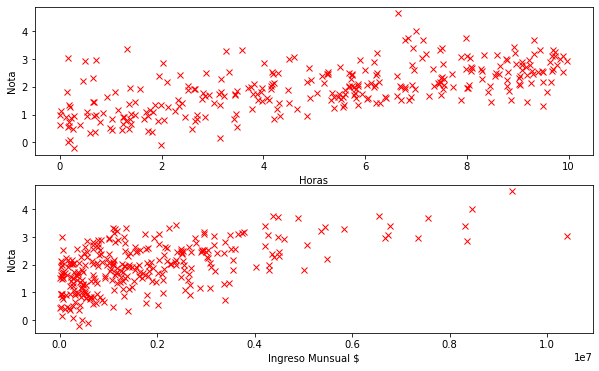

In [2]:
#Creamos un conjunto de datos
N=300
#Usando una semilla
np.random.seed(1)
#Inicializamos el contenedor y llenamos las variables
x=np.array([np.zeros(N),np.zeros(N)])
x[0] = 10*np.random.random(N)
#LLenamos la segunda variable, usando una distribucion gamma
shape, scale = 1., 2.  # mean=4, std=2*sqrt(2)
x[1] = 908526.0*np.random.gamma(shape, scale, N)
#Notas, donde anexamos la parte del ingreso cuadraticamente
y = 0.4+0.2*x[0] +3*(1/(x[1].max()))*x[1]+ 0.4*np.random.randn(N)
print('Normalización theta_2: ',3*(1/(x[1].max()))**2)
# Grafiquemos
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10, 6))
_ = ax[0].plot(x[0], y,'x',color='red',label='Datos')
_ = ax[1].plot(x[1], y,'x',color='red',label='Datos')

ax[0].set(xlabel="Horas",ylabel="Nota")
ax[1].set(xlabel="Ingreso Munsual $",ylabel="Nota")

plt.show()

Ahora usemos las definiciones para actualizar la función de Descenso por Gradiente y usarla con multiples variables.

In [3]:
def GDLR(x,y,Theta,alpha=0.001,steps=100):
    '''Gradient Descent 
        Args:
            - Theta (array float): parámetros iniciales np.ones([1,2])
            - X_train (numpy float arrays): Vector con los valores del rango de entrenamiento
                Ejem:   x = np.array([np.zeros(N),np.zeros(N)])
                        x[1] = 10*np.random.random(N)
            - Y_train( numpy float array): Vector con los valores del dominio de entrenamiento 
            - alpha (float): learning rate
            - steps (int): numero de pasos
        Out:
            - Valor de Theta actualizado a la ultima iteracion (array float)
            - Historico del Thetha
            - Historico del costo
    '''
    #Agregamos la columna correspondiente a $x_0$
    Arreglo = []
    Arreglo.append(np.ones(x.shape[1]))
    for i in x:
        Arreglo.append(i)
        x_train= np.array(Arreglo)
    #Transonemos para que 
    xMatrix = x_train.transpose()

    #Numero de muestras
    m=x.shape[1]
    Theta_0=Theta.transpose()
    histoCost=[]
    HistoTheta=np.zeros(shape=(Theta_0.size,steps))

    for i in range(steps):
        #Calculo de la hypotesis
        Hip = np.dot(xMatrix,Theta_0)
        #Calculo de la diferencia
        diff=Hip-y.transpose()
        #El valor del costo J
        cost=np.sum(diff**2)/(2*m) 
        histoCost.append(cost)
        for indx, j in enumerate(HistoTheta):
            j[i]=Theta_0[indx]
        #Los nuevos thetas
        Theta_0=Theta_0-(alpha/m)*np.dot(diff,xMatrix)
        
    return Theta_0,HistoTheta,histoCost

[]

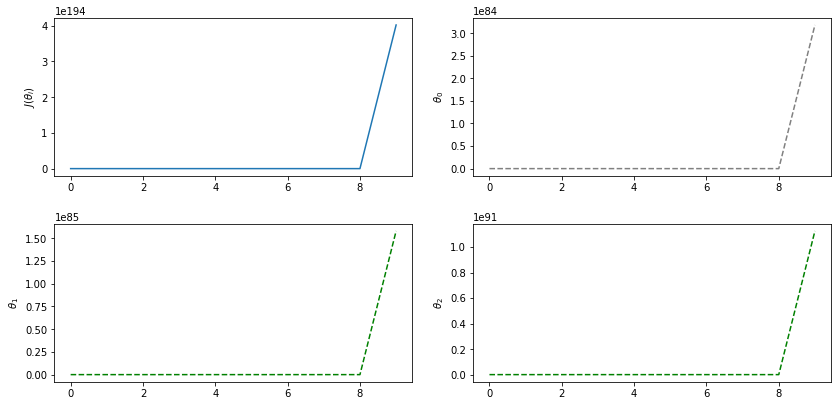

In [4]:
Theta=np.array([0,0,0])
alpha=0.01
steps=10
ThetaFinal ,HistoTheta,histoCost = GDLR(x,y,Theta,alpha=alpha,steps=steps)
fig3, ax3 = plt.subplots(2,2,figsize=(12, 6))
#Pasos
p=np.linspace(0,100,len(HistoTheta[0]))
ax3[0,0].plot(histoCost)
ax3[0,0].set(ylabel=r'$J(\theta_i)$')
ax3[0,1].plot(HistoTheta[0],'--',color="gray")
ax3[0,1].set(ylabel=r'$\theta_0$')
ax3[1,0].plot(HistoTheta[1],'--', color="green")
ax3[1,0].set(ylabel=r'$\theta_1$')
ax3[1,1].plot(HistoTheta[2],'--', color="green")
ax3[1,1].set(ylabel=r'$\theta_2$')

fig3.tight_layout(pad=2.0)
plt.plot()

__Notas:__
- Escalar las variables:
    Una práctica común cuando se usa GD, es la de escalar las variables al intervalo (-1,1), o usar el escalamiento normal:
    $$x'_i=\frac{x_i-\mu_i}{s_i}$$ 
    donde $\mu_i$ es la media de la valores de entrenamiento $x_i$ y $s_i= x_{i,max}-x_{i,min}$ (tambien se puede usar la desivación estándar)
- Cambiar el valor de $\alpha$
    Cuando no se tiene convergencia, o la convergencia esta tomando muchas iteraciones, es recomendable graficar $J(\theta)$ Vs _Número de iteraciones_ y evalual la posibilidad de reducir el valor de $\alpha$.

[]

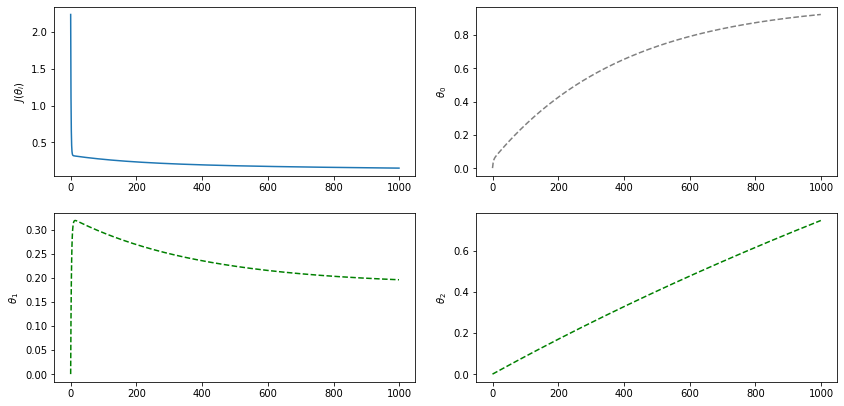

In [5]:
#Escalamos la variable x^(2)
xs=x.copy()
s=x[1].max()-x[1].min()
xs[1] = (x[1] - x[1].mean())/s

Theta=np.array([0,0,0])
alpha=0.01
steps=1000
ThetaFinal ,HistoTheta,histoCost = GDLR(xs,y,Theta,alpha=alpha,steps=steps)
fig3, ax3 = plt.subplots(2,2,figsize=(12, 6))
#Pasos
p=np.linspace(0,100,len(HistoTheta[0]))
ax3[0,0].plot(histoCost)
ax3[0,0].set(ylabel=r'$J(\theta_i)$')
ax3[0,1].plot(HistoTheta[0],'--',color="gray")
ax3[0,1].set(ylabel=r'$\theta_0$')
ax3[1,0].plot(HistoTheta[1],'--', color="green")
ax3[1,0].set(ylabel=r'$\theta_1$')
ax3[1,1].plot(HistoTheta[2],'--', color="green")
ax3[1,1].set(ylabel=r'$\theta_2$')

fig3.tight_layout(pad=2.0)
plt.plot()

Podemos mejorar nuestras características y la forma de nuestra función de hipótesis de un par de formas diferentes.

Podemos combinar múltiples funciones en una. Por ejemplo, podemos combinar la variable de _ingresos mensuales_ con el _número de familiares en el hogar_ y así tener otra variable que puede ser más representativa para nuestro modelo.

### Regresión polinomial
La función de hipótesis no necesita ser lineal, pues si eso no se ajusta bien a los datos, en preincipio podemos cambiar el comportamiento o la curva de la función de hipótesis convirtiéndola en una función cuadrática, cúbica o de raiz cuadrada (o cualquier otra forma).

Por ejemplo, si nuestra función de hipótesis es $h_{\theta}(x) = \theta_0 + \theta_1x_1$, se puede crear funciones adicionales basadas en $x_1$ para obtener la función cuadrática $h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^ 2$.

Una cosa importante a tener en cuenta es que si elige sus características de esta manera, la escala de las variables se vuelve muy importante.

## Ecuacion Normal

El descenso por gradiente proporciona una forma de minimizar la función de costo $J$, pero existe una segunda forma de hacerlo, esta vez realizando la minimización de forma explícita y sin recurrir a un algoritmo iterativo. En el método de la "ecuación normal", se encuentra el conjunto $\theta$ que minimiza $J$ tomando explícitamente sus derivadas con respecto a las $\theta_j$ y poniéndolas a cero. 

Comenzamos con la definición de $J$ (la última versión)

$$
J(\theta) = \dfrac{1}{2m} \sum_{i = 1}^m\left(\theta^Tx-y_{i}\right)^2
$$

Cuando el término $\left(\theta^Tx-y_{i}\right)^2$ se suma en todas las muestras, podemos usar la notación matricial. Definiremos la "matriz de diseño" $X$ ($X$ mayúscula) como una matriz de $m$ filas, en la que cada fila es la $i$-ésima muestra (el vector x^{(i)}). Con esto, podemos reescribir el costo de mínimos cuadrados, reemplazando la suma explícita por la multiplicación de matrices:

$$
J(\theta) = \dfrac{1}{2m} \left(X\theta-y\right)^T\left(X\theta-y\right)
$$

Ahora, usando algunas identidades de transposición de matrices, podemos simplificar
$$
\begin{equation}
    \begin{split}
        J(\theta)   & = ((X\theta)^T-y^T)(X\theta-y)\\
                    & = (X\theta)^T X\theta-(X\theta)^T y-y^T(X\theta)+y^Ty)\\
                    & = (X\theta)^T X\theta-2(X\theta)^T y+y^Ty)\\
    \end{split}
\end{equation}
$$

Para encontrar dónde la función tiene un mínimo, derivamos por $\theta$ e igualamos a $0$. 
$$
\frac{\partial}{\partial\theta}J = 2X^TX\theta-2X^Ty =0
$$
Luego asumiendo que $X^TX$ tiene inverza, concluimos que

$$\theta = (X^T X)^{- 1}X^Ty$$


In [6]:
def Normal(X,y):    
    '''Ecuación Normal 
    Args:
        - X (numpy float arrays): Matriz de diseño
        - y( numpy float array): Vector con los valores del dominio de entrenamiento 
        Out:
            - Valor de Theta en un min
    '''
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [7]:
#lo primero que hacemos es crear la matriz de diseño X, con x del ejercicio anterior
#Agregamos la columna correspondiente a $x_0$
Arreglo = []
Arreglo.append(np.ones(x.shape[1]))
for i in x:
    Arreglo.append(i)
    x_train= np.array(Arreglo)
#Transonemos para que 
MD = x_train.transpose()
Theta_N=Normal(MD,y)

In [8]:
Theta_N

array([4.64878112e-01, 1.89870145e-01, 2.83434229e-07])

Con la ecuación normal, calcular la inversión tiene complejidad $\mathcal{O}(n^3)$. Luego, si tenemos una gran cantidad de variables, la ecuación normal será lenta. En la práctica, cuando $n$ supera los $10.000$, podría ser un buen momento para pasar de una solución normal a un proceso iterativo.